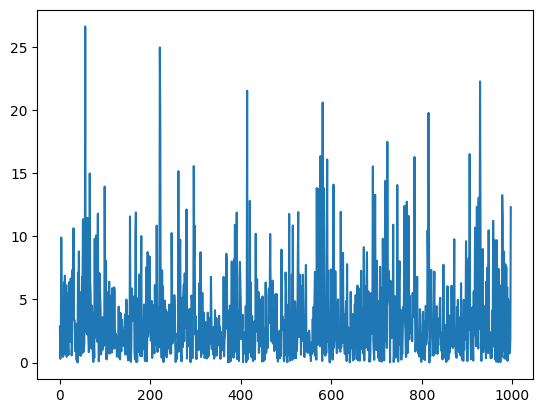

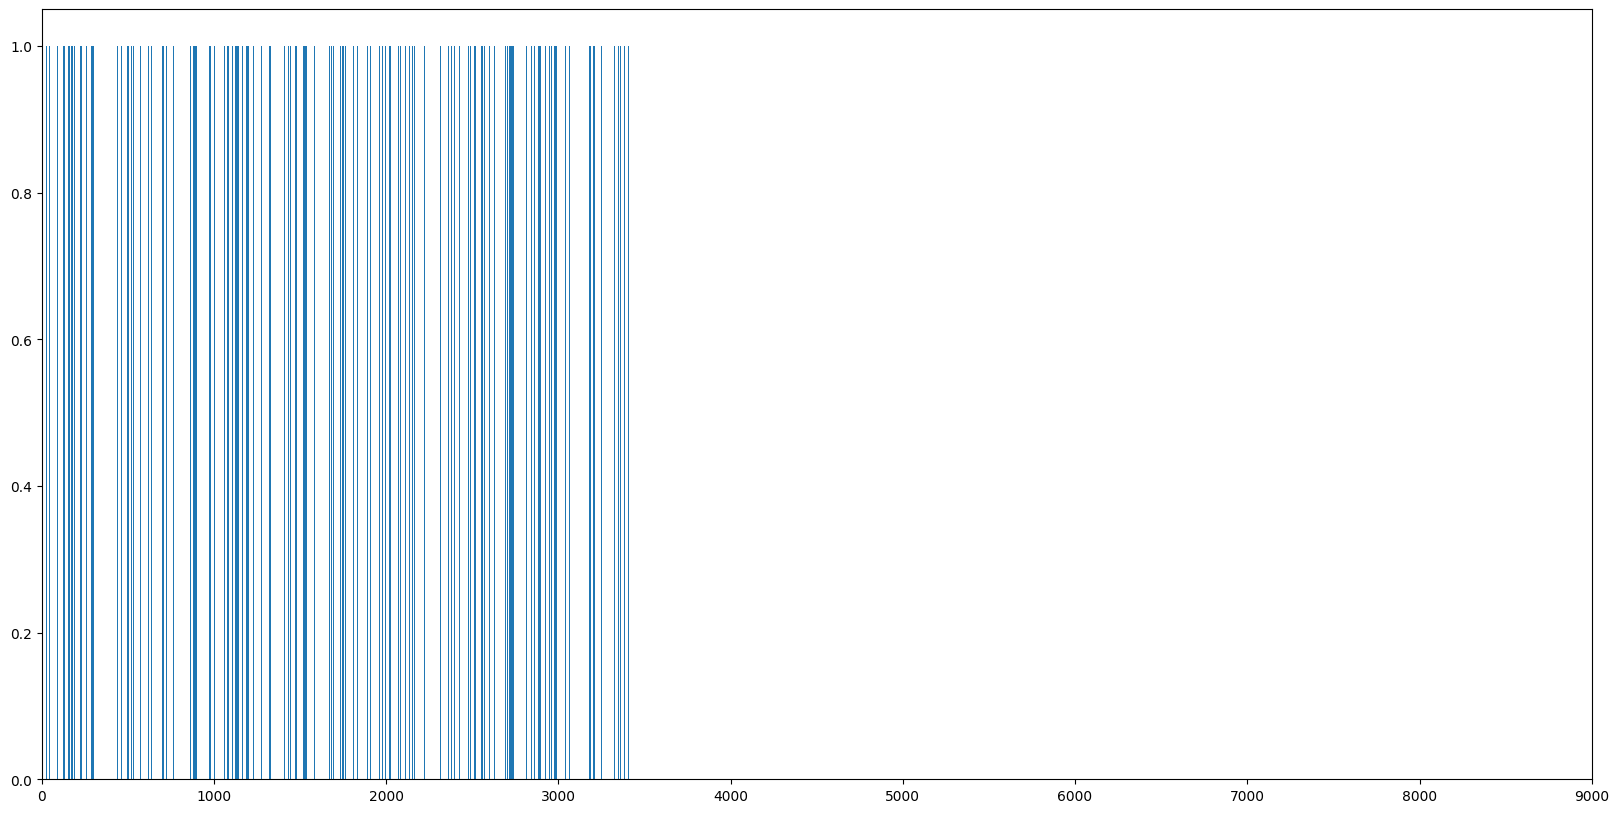

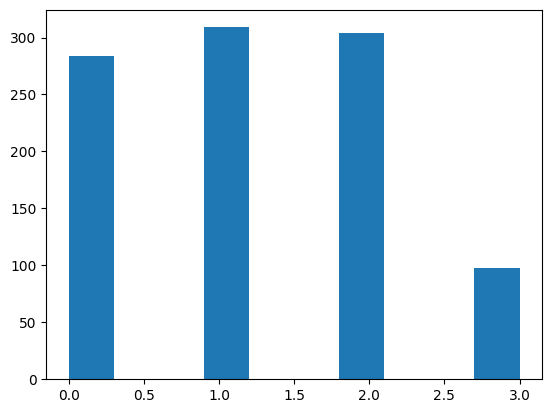

In [1]:
from math import log, exp
from matplotlib import pyplot as plt
import numpy as np
import random

TO_GENERATE = 999
BORDER = 9000
LAMBDA = 0.3
DEVIDER = 9

random_numbers: list[float] = [random.uniform(0,1) for i in range(1, TO_GENERATE)]
processed_numbers: list[float] = [-log(i) / LAMBDA for i in random_numbers] # Length = TO_GENERATE

plt.plot(processed_numbers)
plt.show()

output: dict = {}

temp = processed_numbers[0]
for i in range(0, len(processed_numbers)):
    output[temp] = 1
    temp += processed_numbers[i]

plt.figure(figsize=(20,10))
plt.bar(output.keys(), output.values())
plt.xlim(0,9000)
plt.show()

INTERVAL_LENGTH = BORDER / DEVIDER

intervals: list = [i*INTERVAL_LENGTH for i in range(1, DEVIDER)]
to_hist: list = []
output_keys: list = list.copy(list(output.keys()))
counter = 0
interval_number = 0

for i in range(0, len(output_keys)):
    if output_keys[i] > interval_number*INTERVAL_LENGTH and output_keys[i] <= interval_number*INTERVAL_LENGTH+INTERVAL_LENGTH:
        to_hist+=[interval_number]
    else:
        interval_number+=1

plt.hist(to_hist)
plt.show()


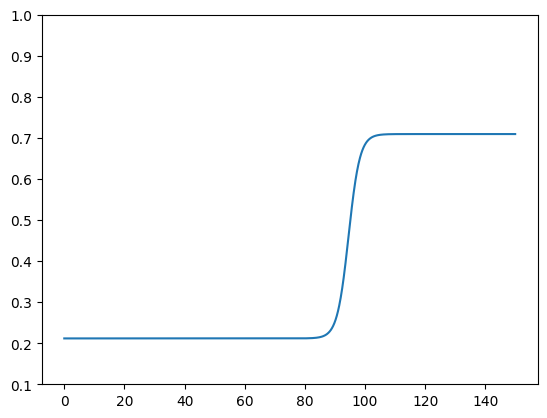

In [28]:
from patterns import *

pattern = Sigmoid()

pattern.random_start_values(90, 0.01, 0.1, 0.3)

coords = pattern.generate_coordinates()

from matplotlib import pyplot as plt
plt.plot(coords.keys(), coords.values())
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()